<a href="https://colab.research.google.com/github/HarshaniDil/Tourist_prediction/blob/main/NewTourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn import linear_model

url='https://raw.githubusercontent.com/HarshaniDil/Tourist_prediction/main/Updated2.csv'
df=pd.read_csv(url)
df
df['Month'] = pd.to_datetime(df['Month'], infer_datetime_format=True)
indexedDataset = df.set_index(['Month'])

In [ ]:
#Print top five values
from datetime import datetime
indexedDataset.head(5)

,Tourists
Month,
2014-01-28,146575
2014-02-28,141878
2014-03-28,133048
2014-04-28,112631
2014-05-28,90046


In [8]:
#last five data
from datetime import datetime
indexedDataset.tail(5)

,Tourists
Month,
2019-08-28,143587
2019-09-28,108575
2019-10-28,118743
2019-11-28,176984
2019-12-28,241663


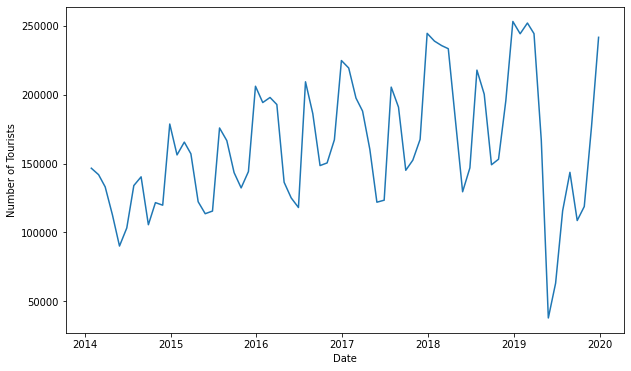

In [9]:
# plot a graph
plt.xlabel("Date")
plt.ylabel("Number of Tourists")
plt.plot(indexedDataset)

In [10]:
#Determing Rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()
rolstd = indexedDataset.rolling(window=12).std()
print(rolmean,rolstd)

                 Tourists
Month                    
2014-01-28            NaN
2014-02-28            NaN
2014-03-28            NaN
2014-04-28            NaN
2014-05-28            NaN
...                   ...
2019-08-28  168224.833333
2019-09-28  164848.833333
2019-10-28  161983.833333
2019-11-28  160434.000000
2019-12-28  159475.166667

[72 rows x 1 columns]                 Tourists
Month                   
2014-01-28           NaN
2014-02-28           NaN
2014-03-28           NaN
2014-04-28           NaN
2014-05-28           NaN
...                  ...
2019-08-28  72979.744487
2019-09-28  74858.382417
2019-10-28  75997.192292
2019-11-28  75437.300875
2019-12-28  74214.668898

[72 rows x 1 columns]


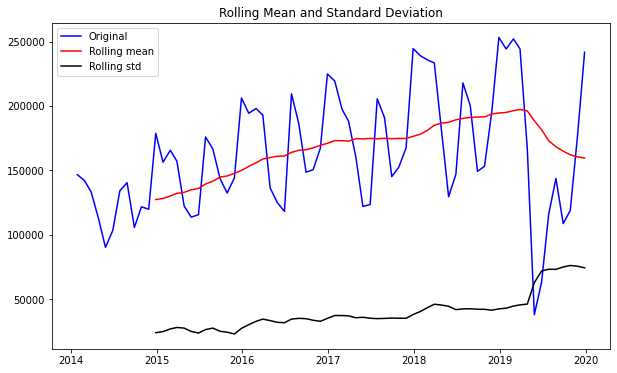

In [11]:
#plot rolling statistics:
orig = plt.plot(indexedDataset, color="blue", label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling mean")
std = plt.plot(rolstd, color="black", label="Rolling std")
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [12]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['Tourists'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observation Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.981447
p-value                        0.294767
#Lags Used                    12.000000
Number of Observation Used    59.000000
Critical Value (1%)           -3.546395
Critical Value (5%)           -2.911939
Critical Value (10%)          -2.593652
dtype: float64


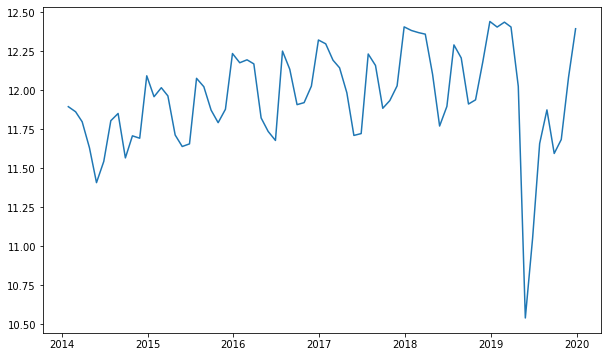

In [13]:
#estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)


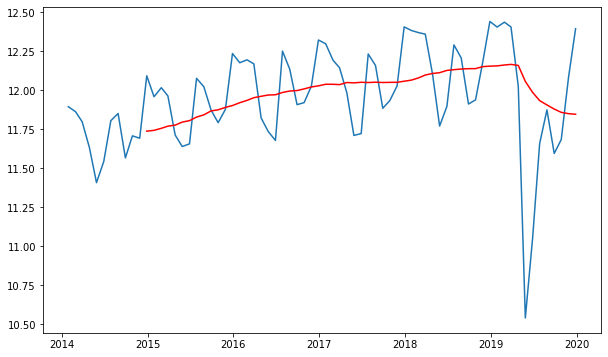

In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [15]:
datasetLogScaleMinuMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinuMovingAverage.head(12)

#Remove Non values
datasetLogScaleMinuMovingAverage.dropna(inplace=True)
datasetLogScaleMinuMovingAverage.head(5)

,Tourists
Month,
2014-12-28,0.355054
2015-01-28,0.215610
2015-02-28,0.260543
2015-03-28,0.194073
2015-04-28,-0.063507


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

  #Determing Rolling Statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()

  #Plot rolling statistics:
  orig = plt.plot(timeseries, color="blue", label="Original")
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color="Black", label="Rolling Std")
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Tourists'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistics','p-value', '#Lags Used', 'Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

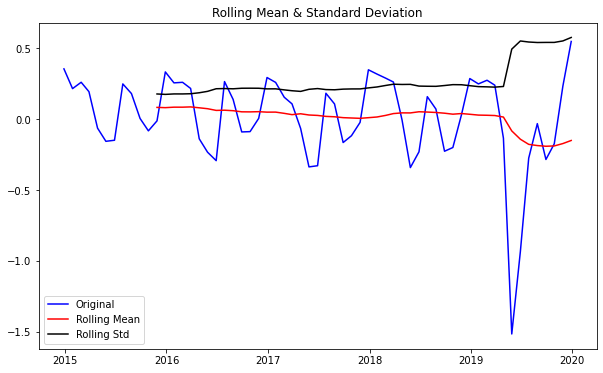

Results of Dickey-Fuller Test:
Test Statistics                 1.303131
p-value                         0.996626
#Lags Used                     11.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [17]:
test_stationarity(datasetLogScaleMinuMovingAverage)

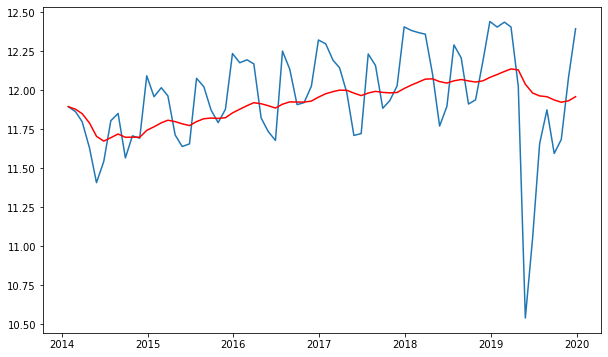

In [18]:
#Weighted Average of Time series
exponentialDecayweightAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayweightAverage, color="Red")

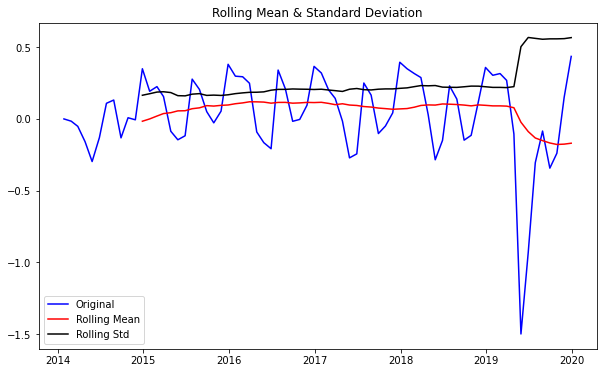

Results of Dickey-Fuller Test:
Test Statistics                -0.088441
p-value                         0.950578
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [19]:
datasetLogScaleMinuMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayweightAverage
test_stationarity(datasetLogScaleMinuMovingExponentialDecayAverage)

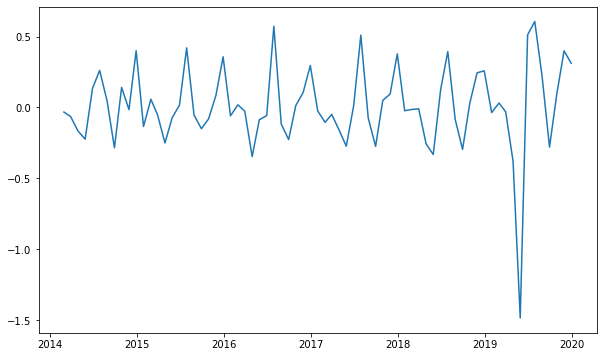

In [20]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

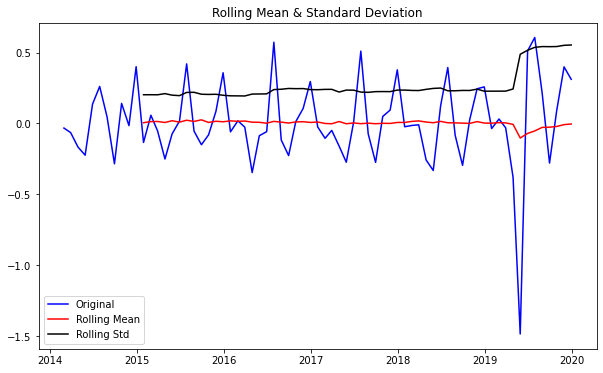

Results of Dickey-Fuller Test:
Test Statistics                -1.318852
p-value                         0.620504
#Lags Used                     12.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

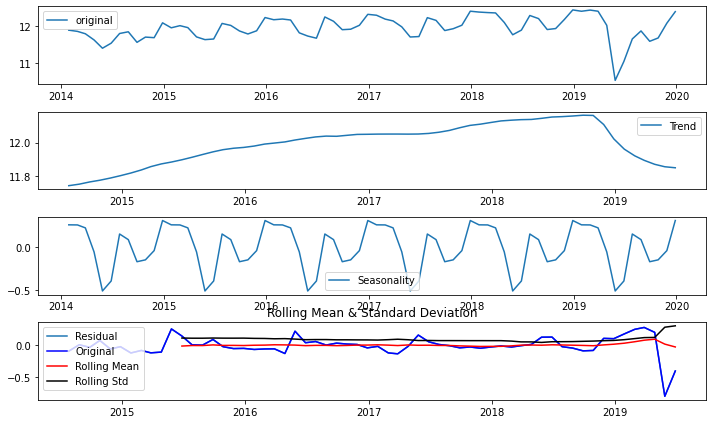

Results of Dickey-Fuller Test:
Test Statistics                -5.288439
p-value                         0.000006
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [46]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale, freq = 12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label="original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)




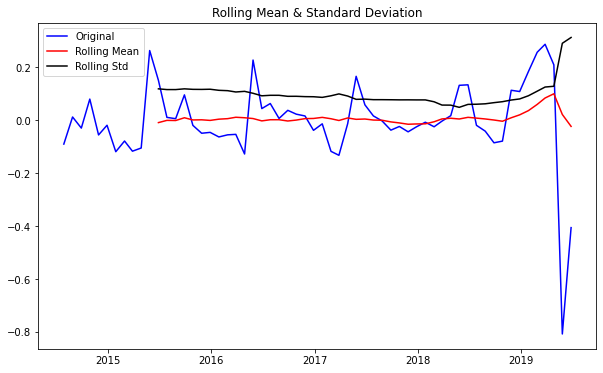

Results of Dickey-Fuller Test:
Test Statistics                -5.288439
p-value                         0.000006
#Lags Used                      5.000000
Number of Observations Used    54.000000
Critical Value (1%)            -3.557709
Critical Value (5%)            -2.916770
Critical Value (10%)           -2.596222
dtype: float64


In [47]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


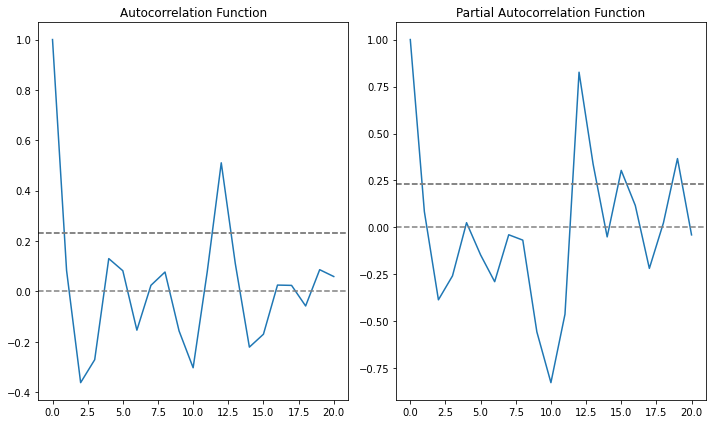

In [84]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle="--", color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle="--",color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plottinf AR model


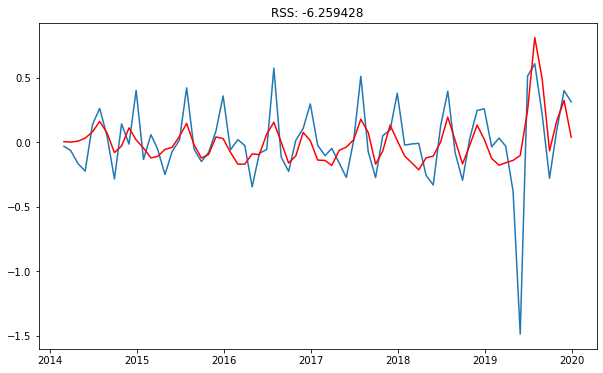

In [85]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logScale, order=(1,1,5))
results_AR = model.fit( disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: % 4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting['Tourists']**2)))
print('Plottinf AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plottinf AR model


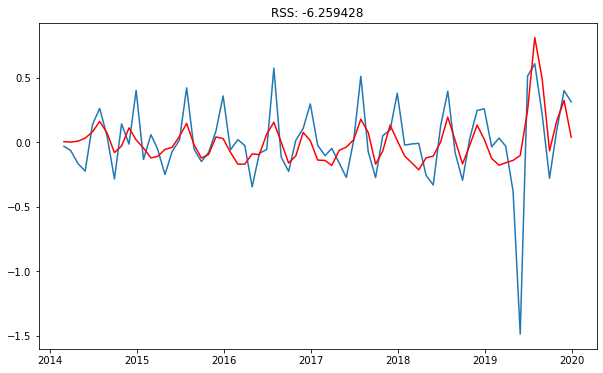

In [124]:
from statsmodels.tsa.arima_model import ARIMA

#MA Model
model = ARIMA(indexedDataset_logScale, order=(1,1,5))
results_MA = model.fit( disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: % 4f' %sum((results_AR.fittedvalues-datasetLogDiffShifting['Tourists']**2)))
print('Plottinf AR model')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: -6.442314')

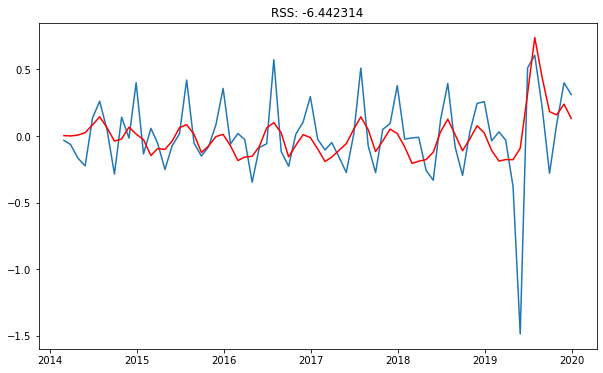

In [193]:
model = ARIMA(indexedDataset_logScale, order=(2,1,1))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: % 4f' %sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Tourists']**2)))

In [128]:
prediction_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(prediction_ARIMA_diff.head())

Month
2014-02-28    0.003467
2014-03-28    0.010665
2014-04-28    0.025245
2014-05-28    0.065797
2014-06-28    0.120410
dtype: float64


In [129]:
#Convert to cumulative sum
prediction_ARIMA_diff_cumsum = prediction_ARIMA_diff.cumsum()
print(prediction_ARIMA_diff_cumsum.head())

Month
2014-02-28    0.003467
2014-03-28    0.014132
2014-04-28    0.039377
2014-05-28    0.105175
2014-06-28    0.225584
dtype: float64


In [246]:
prediction_ARIMA_log = pd.Series(indexedDataset_logScale['Tourists'], index=indexedDataset_logScale.index)
prediction_ARIMA_log = prediction_ARIMA_log.add(prediction_ARIMA_diff_cumsum, fill_value=0)
prediction_ARIMA_log.head()

Month
2014-01-28    11.895293
2014-02-28    11.866190
2014-03-28    11.812598
2014-04-28    11.671250
2014-05-28    11.513251
dtype: float64

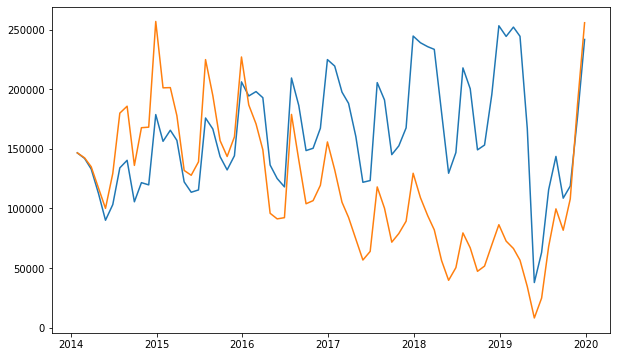

In [170]:
prediction_ARIMA = np.exp(prediction_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(prediction_ARIMA)

In [208]:
indexedDataset_logScale

,Tourists
Month,
2014-01-28,11.895293
2014-02-28,11.862723
2014-03-28,11.798465
2014-04-28,11.631872
2014-05-28,11.408076
...,...
2019-08-28,11.874696
2019-09-28,11.595196
2019-10-28,11.684717


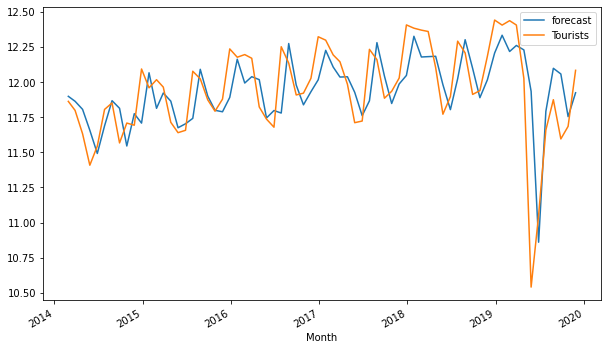

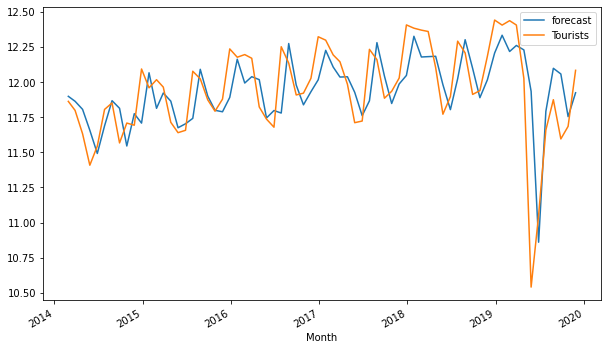

In [257]:
results_ARIMA.plot_predict(1,70) 




In [ ]:
results_ARIMA.forecast(steps=60)